Dodge1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

The problem is one tail
This is the p_value:  0.0013498980316301035
Since p_value is smaller than the significance level we reject the null hypothesis


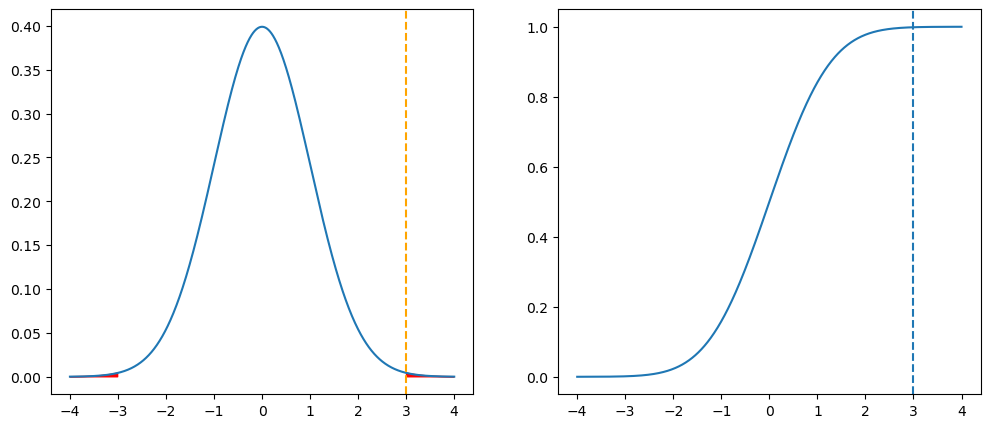

In [21]:
import numpy as np
from scipy import stats, optimize
from matplotlib import pyplot as plt 
import pandas as pd

fig1, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

print("The problem is one tail")
mean_h0 = 6.3
value_h1 = 15
xs = np.linspace(-4,4,1000)

pdfs = stats.norm.pdf(xs)
cdfs = stats.norm.cdf(xs)

ax[0].plot(xs,pdfs)
ax[0].axvline(3, linestyle='--', color='orange')
ax[0].fill_between(xs, pdfs, where=np.abs(xs) > 3, color='red')
ax[1].plot(xs,cdfs)
ax[1].axvline(3, linestyle='--')
p_value = 1 - stats.norm.cdf(3)
print("This is the p_value: ",p_value)
print('Since p_value is smaller than the significance level we reject the null hypothesis')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [82]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = 10
mu1 = np.mean(pre)
mu2 = np.mean(post)
sigma1 = np.std(pre, ddof=1)
sigma1 = np.std(post,ddof=1)
sigma = np.sqrt((sigma1**2 + sigma2**2)/2)
T = (mu1 - mu2)/(sigma* np.sqrt(2/n))
print("The T value is = ", T)

The T value is =  -3.8568863748183873


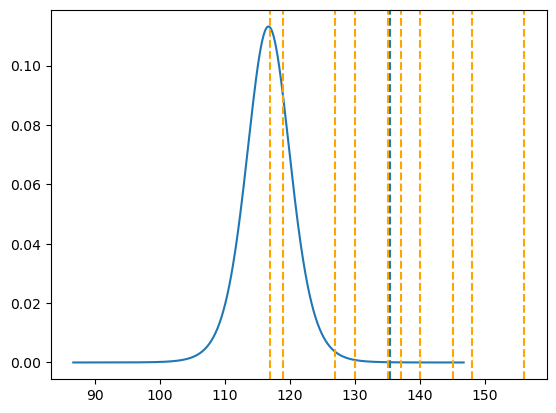

In [83]:
x = np.linspace(mu1-30, mu1 + 30, 1000)
pdf2 = stats.t.pdf(x, loc=mu1, scale=sigma / np.sqrt(len(post)), df=len(post) - 1)
cdf2 = stats.t.cdf(x, loc=mu1, scale=sigma / np.sqrt(len(post)), df=len(post) - 1)

plt.axvline(mu2,linestyle='--')
plt.plot(x,pdf2)
for s in post:
    plt.axvline(s,linestyle='--', color='orange')


p_value is :  0.0038654122907762125


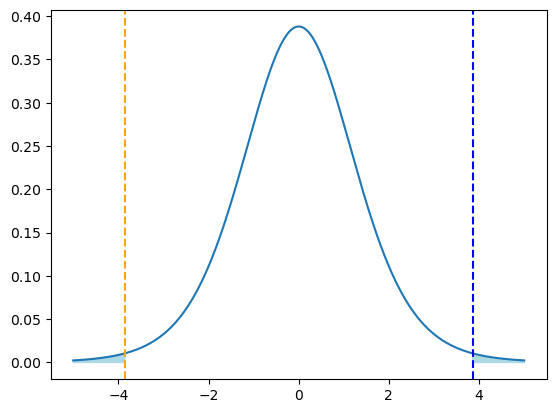

In [84]:
xs2 = np.linspace(-5,5,1000)
ys2 = stats.t.pdf(xs, len(post)-1)
plt.plot(xs2, ys2)
plt.fill_between(xs2, ys2, where=np.abs(xs2) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
print("p_value is : ", stats.t.cdf(T, n - 1) + (1 - stats.t.cdf(-T, n - 1)))

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

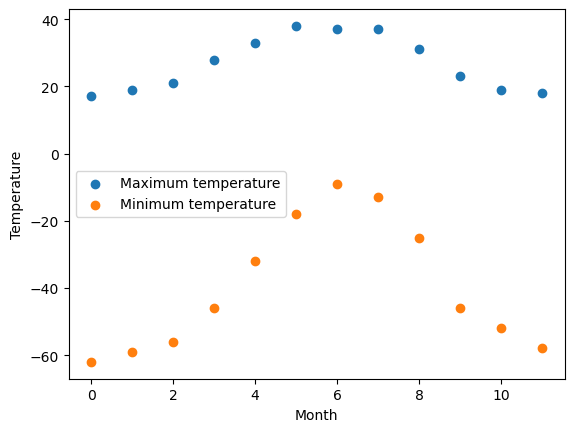

In [4]:

t = np.arange(0, len(max_temp))
max_temp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])

min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
plt.scatter(t, max_temp, label="Maximum temperature")
plt.scatter(t, min_temp, label="Minimum temperature")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend()
plt.show()


In [13]:
def fit_func(x, a, mu, sig, d):
    return (a * np.exp(-(x-mu)**2/sig**2)) + d

max_mean = np.mean(max_temp)
max_std = np.std(max_temp, ddof = 1)
max_popt, max_pcov = optimize.curve_fit(fit_func, t, max_temp, p0=[40, 6, 5, 20])

min_mean = np.mean(min_temp)
min_std = np.std(min_temp, ddof = 1)
min_popt, min_pcov = optimize.curve_fit(fit_func, t, min_temp, p0=[60, 6, 5, -60])
print(min_popt)
print(max_popt)

[ 52.64929241   6.16452594   2.79434489 -61.32093743]
[23.09208706  5.73581635  3.24482238 15.77931858]


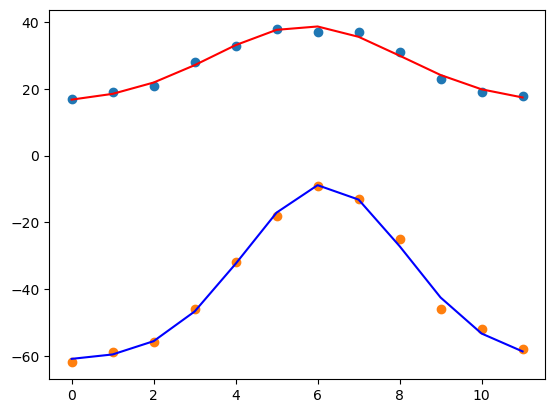

In [14]:
plt.scatter(t, max_temp, label='data')
plt.scatter(t, min_temp, label='data')

plt.plot(t, fit_func(t, *max_popt), color='red')
plt.plot(t, fit_func(t, *min_popt), color='blue')

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [15]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-01-20 14:51:25--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-01-20 14:51:25--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2b0f612c999019df9775cbd3f8.dl.dropboxusercontent.com/cd/0/inline/B06Cne2qUdb8YON944kcwImQJO2cq2Li6I9lhZZoCU80kX0eOwKxrOv8dVAqXqoy4tU_3PE7j7VAFmPjhWQk1Mf1TmJGFIw81DtVqtWXPrC8Pn9EOkNIgHvT8rQqhIQu_rQakFUdIzqiISZl-0mtRyVol8FE5r8VWIXvwG_5JJJsnw/file# [following]
--2023-01-20 14:51:25--  https://uc2b0f612c999019df9775cbd3f8.dl.dropboxusercontent.com/cd/0/inline/B06Cne2qUdb8YON944kcwImQJO2cq2Li6I9lhZZoCU80kX0eOwKxrOv8dVAqXq

In [20]:
!ls data
!hexdump -C data/residuals_261.pkl | head -n5 

magic04.data  magic04.names  populations.txt  residuals_261.pkl  weather.csv
00000000  80 04 95 cc 00 00 00 00  00 00 00 8c 15 6e 75 6d  |.............num|
00000010  70 79 2e 63 6f 72 65 2e  6d 75 6c 74 69 61 72 72  |py.core.multiarr|
00000020  61 79 94 8c 0c 5f 72 65  63 6f 6e 73 74 72 75 63  |ay..._reconstruc|
00000030  74 94 93 94 8c 05 6e 75  6d 70 79 94 8c 07 6e 64  |t.....numpy...nd|
00000040  61 72 72 61 79 94 93 94  4b 00 85 94 43 01 62 94  |array...K...C.b.|
hexdump: write error


In [44]:
import pickle

In [136]:
with open("data/residuals_261.pkl", 'rb') as f:
    unpickled_file = pickle.load(f)
noisy_data = unpickled_file.tolist()['residuals']
print(noisy_data)

[ 1.1        -1.95       -7.2        ...  0.08333333  0.16666667
  0.08333333]


In [163]:
mu = np.mean(noisy_data)
std = np.std(noisy_data)
a = mu - std - 4
b = mu + std + 2

i = np.where((noisy_data > a) & (noisy_data < b))
data = noisy_data[i]

h, bins = np.histogram(data, bins=30)
bin_centers = (bins[1:] + bins[:-1]) / 2
w = bins[1] - bins[0]

In [177]:
def crystalball(x, a, beta, m, s):
    return a * stats.crystalball.pdf(x, beta, m, scale=s)


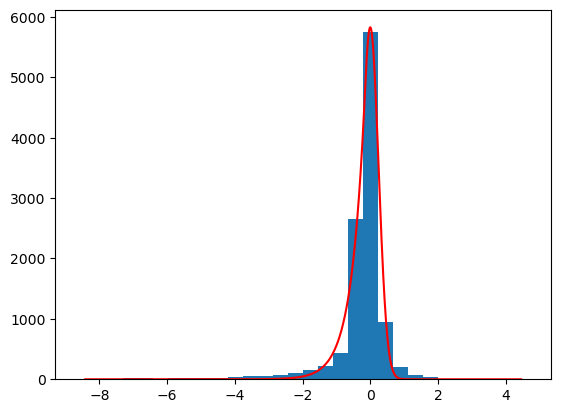

In [178]:
params, cov =  optimize.curve_fit(crystalball, bin_centers, h, p0 = [20000, 2, 3, 0.1])
plt.bar(bin_centers, h, width=w)

x = np.linspace(bin_centers[0], bin_centers[-1], 1000)
y = crystalball(x, *params)
plt.plot(x, y, color='red')
plt.show()

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?
   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

## My answer to the questions above:
* The b parameter is for shifting the phase of the cos function.

In [237]:
def f1(t,a,b,c):
    return a*np.cos(2*np.pi*t + b) + c

def f2(t,a,b,c,d):
    return a*np.cos(2*np.pi*b*t + c) + d

6679
[-9.98813367 -0.23334759  9.38411487]
The overal average temp is:  9.384097734976043
The coldest day after fitting by first model is:  -0.6037388636922199
The hottest day after fitting by first model is:  19.372195544559123


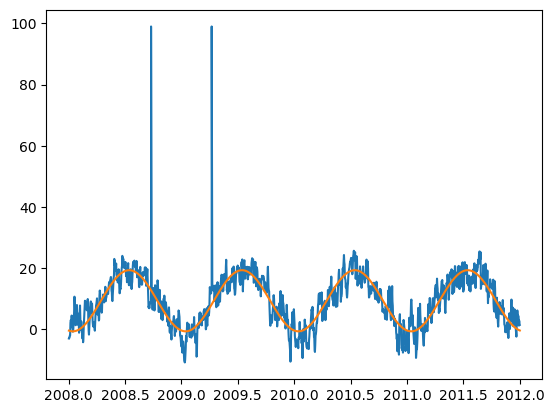

In [257]:
data = pd.read_csv("data/munich_temperatures_average_with_bad_data.txt", header = None, delimiter=" ")
data = np.array(data)
print(len(data))
#for d in 
data2 = data[np.where(np.logical_and(data[:,0] >= 2008, data[:,0] <=2012))]

t = data2[:,0]
y = data2[:,1]

plt.plot(t, y)
params, cov = optimize.curve_fit(f1, t, y, p0=[40,1,1])
print(params)
y1 = f1(t, *params)
plt.plot(t, y1)

print("The overal average temp is: ", np.mean(y))
print("The coldest day after fitting by first model is: ", np.min(y1))
print("The hottest day after fitting by first model is: ", np.max(y1))

[ -9.98223777   1.00144368 -12.18315601   9.39812127]


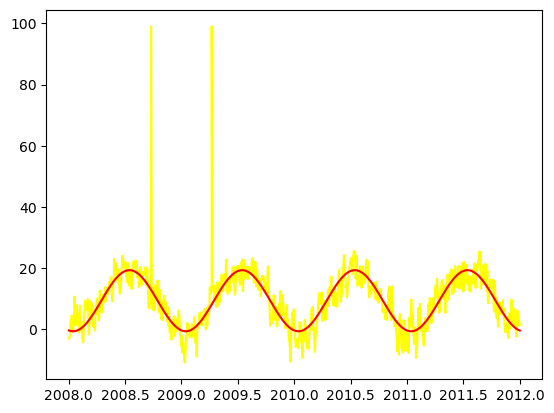

In [258]:
plt.plot(t, y, color='yellow')
params, cov = optimize.curve_fit(f2, t, y, p0=[40,1,1,1])
print(params)
y2 = f2(t,*params)
plt.plot(t, y2, color='red')

In [ ]:
alpha = 0.05

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

tss = np.sum((np.mean(y) - y)**2)

ssr_y1 = np.sum((y1 - y)**2)
ry1 = 1 - ssr_y1/tss
ndof_y1 = 3 - 1

ssr_y2 = np.sum((y2 - y)**2)
ry2 = 1- ssr_y2/tss
ndof_y2 = 4 - 1

print(f"SSR of f(x): {ssr_y1}, R = {ry1}")
print(f"SSR of g(x): {ssr_y2}, R = {ry2}")

print("Test f(x) vs g(x):")
pval_1_vs_2 = Ftest(ssr_y1, ssr_y2, ndof_y1, ndof_y2, len(y), verbose=True)